In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip -q '/content/drive/MyDrive/Tensorflow Course 1/Datasets/horse-or-human.zip'

In [ ]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
base_dir = '/content/data'
os.makedirs(base_dir, exist_ok=True)

In [ ]:
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

In [ ]:
train_horse_dir = os.path.join(train_dir, 'horse')
train_human_dir = os.path.join(train_dir, 'human')

test_horse_dir = os.path.join(test_dir, 'horse')
test_human_dir = os.path.join(test_dir, 'human')


os.makedirs(train_horse_dir, exist_ok=True)
os.makedirs(train_human_dir, exist_ok=True)

os.makedirs(test_horse_dir, exist_ok=True)
os.makedirs(test_human_dir, exist_ok=True)

In [ ]:
all_horse_images = [img for img in os.listdir('/content/horses')
                    if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
all_human_images = [img for img in os.listdir('/content/humans')
                    if img.lower().endswith(('.png', '.jpg', '.jpeg'))]

In [ ]:
import shutil

def copy_imgs(files_list, src_dir, dst_dir):
  for file in files_list:
    src_path = os.path.join(src_dir, file)
    dst_path = os.path.join(dst_dir, file)
    shutil.copyfile(src_path, dst_path)


copy_imgs(all_horse_images, '/content/horses', train_horse_dir)


copy_imgs(all_human_images, '/content/humans', train_human_dir)

In [ ]:
validation_horse_or_human_dir = '/content/validation_horse_human_dir'
os.makedirs(validation_horse_or_human_dir, exist_ok=True)

In [ ]:
import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/Tensorflow Course 1/Datasets/validation-horse-or-human.zip', 'r') as zip_ref:
  zip_ref.extractall(validation_horse_or_human_dir)

In [ ]:
all_vald_horse_imgs = [img for img in os.listdir('/content/validation_horse_human_dir/horses')
                      if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
all_vald_human_imgs = [img for img in os.listdir('/content/validation_horse_human_dir/humans')
                      if img.lower().endswith(('.png', '.jpg', '.jpeg'))]

In [ ]:
copy_imgs(all_vald_horse_imgs, '/content/validation_horse_human_dir/horses', test_horse_dir)
copy_imgs(all_vald_human_imgs, '/content/validation_horse_human_dir/humans', test_human_dir)

In [ ]:
print(f'total images in training horse dir: {len(os.listdir(train_horse_dir))}')
print(f'total images in training human dir: {len(os.listdir(train_human_dir))}')

print(f'\ntotal images in validation horse dir: {len(os.listdir(test_horse_dir))}')
print(f'\ntotal images in validation human dir: {len(os.listdir(test_human_dir))}')

total images in training horse dir: 500
total images in training human dir: 527

total images in validation horse dir: 128

total images in validation human dir: 128


In [ ]:
TRAIN_DIR = '/content/data/train'
VALIDATION_DIR = '/content/data/test'

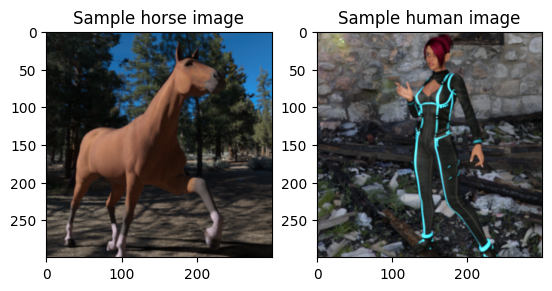

In [ ]:
# Directories for each class
horses_dir = os.path.join(TRAIN_DIR, 'horse')
humans_dir = os.path.join(TRAIN_DIR, 'human')

# Load the first example of each one of the classes
sample_image_horse  = tf.keras.preprocessing.image.load_img(os.path.join(horses_dir, os.listdir(horses_dir)[0]))
sample_image_human  = tf.keras.preprocessing.image.load_img(os.path.join(humans_dir, os.listdir(humans_dir)[0]))

ax = plt.subplot(1,2,1)
ax.imshow(sample_image_horse)
ax.set_title('Sample horse image')

ax = plt.subplot(1,2,2)
ax.imshow(sample_image_human)
ax.set_title('Sample human image')
plt.show()

In [ ]:
# Convert the image into its numpy array representation
sample_array = tf.keras.preprocessing.image.img_to_array(sample_image_horse)

print(f"Each image has shape: {sample_array.shape}")

Each image has shape: (300, 300, 3)


In [ ]:
# GRADED FUNCTION: train_val_datasets

def train_val_datasets():
    """Creates training and validation datasets

    Returns:
        (tf.data.Dataset, tf.data.Dataset): training and validation datasets
    """

    ### START CODE HERE ###

    training_dataset = tf.keras.utils.image_dataset_from_directory(
        directory=TRAIN_DIR,
        batch_size=32,
        image_size=(150, 150),
        shuffle=True,
        seed=7
    )

    validation_dataset = tf.keras.utils.image_dataset_from_directory(
        directory=VALIDATION_DIR,
        batch_size=32,
        image_size=(150, 150),
        shuffle=True,
        seed=7
    )

    ### END CODE HERE ###

    return training_dataset, validation_dataset

In [ ]:
# Test your generators
training_dataset, validation_dataset = train_val_datasets()

Found 1027 files belonging to 2 classes.
Found 256 files belonging to 2 classes.


In [ ]:
val_batches = int(validation_dataset.cardinality())
test_dataset, validation_dataset = tf.keras.utils.split_dataset(validation_dataset, val_batches//5)

print(f'Number of validation batches: {validation_dataset.cardinality()}')
print(f'Number of test batches: {test_dataset.cardinality()}')

Number of validation batches: 7
Number of test batches: 1


In [ ]:
# Define the path to the inception v3 weights
LOCAL_WEIGHTS_FILE = '/content/drive/MyDrive/Tensorflow Course 2/pretrained model/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [ ]:
# GRADED FUNCTION: create_pre_trained_model

def create_pre_trained_model():
    """Creates the pretrained inception V3 model

    Returns:
        tf.keras.Model: pre-trained model
    """

    ### START CODE HERE ###

    pre_trained_model = tf.keras.applications.inception_v3.InceptionV3(
        include_top=False,
        input_shape=(150, 150, 3),
        weights=None
    )
    pre_trained_model.load_weights(LOCAL_WEIGHTS_FILE)
    # Make all the layers in the pre-trained model non-trainable
    for layer in pre_trained_model.layers:
        layer.trainable = False

    ### END CODE HERE ###

    return pre_trained_model

In [ ]:
# Create the pre-trained model
pre_trained_model = create_pre_trained_model()

# Count the total number of parameters and how many are trainable
num_total_params = pre_trained_model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in pre_trained_model.trainable_weights])

print(f"There are {num_total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 21,802,784 total parameters in this model.
There are 0 trainable parameters in this model.


In [ ]:
# Print the model summary
pre_trained_model.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 74, 74,    │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 74, 74,    │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 74, 74,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 72, 72,    │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 72, 72,    │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 72, 72,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 72, 72,    │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 72, 72,    │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 72, 72,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 35, 35,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 35, 35,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 35, 35,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 35, 35,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 33, 33,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 33, 33,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 33, 33,    │          0 │ batch_normalizat

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 21,802,784 (83.17 MB)

In [ ]:
# Define a Callback class that stops training once accuracy reaches 99.9%
class EarlyStoppingCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs['accuracy']>0.999:
            self.model.stop_training = True
            print("\nReached 99.9% accuracy so cancelling training!")

In [ ]:
# GRADED FUNCTION: output_of_last_layer

def output_of_last_layer(pre_trained_model):
    """Fetches the output of the last desired layer of the pre-trained model

    Args:
        pre_trained_model (tf.keras.Model): pre-trained model

    Returns:
        tf.keras.KerasTensor: last desired layer of pretrained model
    """
    ### START CODE HERE ###

    last_desired_layer = pre_trained_model.get_layer('mixed7')

    last_output = last_desired_layer.output

    print('last layer output shape: ', last_output.shape)

    ### END CODE HERE ###

    return last_output

In [ ]:
last_output = output_of_last_layer(pre_trained_model)

last layer output shape:  (None, 7, 7, 768)


In [ ]:
# Print the type of the pre-trained model
print(f"The pretrained model has type: {type(pre_trained_model)}")

The pretrained model has type: <class 'keras.src.models.functional.Functional'>


In [ ]:
# GRADED FUNCTION: create_final_model

def create_final_model(pre_trained_model, last_output):
    """Creates final model by adding layers on top of the pretrained model.

    Args:
        pre_trained_model (tf.keras.Model): pre-trained inceptionV3 model
        last_output (tf.keras.KerasTensor): last layer of the pretrained model

    Returns:
        Tensorflow model: final model
    """

    # Flatten the output layer of the pretrained model to 1 dimension
    x = tf.keras.layers.Flatten()(last_output)

    ### START CODE HERE ###

    # Add a fully connected layer with 1024 hidden units and ReLU activation
    x = tf.keras.layers.Dense(1024, activation='relu')(x)
    # Add a dropout rate of 0.2
    x = tf.keras.layers.Dropout(0.2)(x)
    # Add a final sigmoid layer for classification
    x = tf.keras.layers.Dense(1, activation='sigmoid')(x)

    # Create the complete model by using the Model class
    model = tf.keras.Model(pre_trained_model.input, x)

    # Compile the model
    model.compile(
        optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.00001),
        loss='binary_crossentropy', # use a loss for binary classification
        metrics=['accuracy']
    )

    ### END CODE HERE ###

    return model

In [ ]:
# Save your model in a variable
model = create_final_model(pre_trained_model, last_output)

# Inspect parameters
total_params = model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 47,512,481 total parameters in this model.
There are 38,537,217 trainable parameters in this model.


In [ ]:
# Define the preprocess function
def preprocess(image, label):
    image = tf.keras.applications.inception_v3.preprocess_input(image)
    return image, label

# Apply the preprocessing to all datasets
training_dataset = training_dataset.map(preprocess)
validation_dataset = validation_dataset.map(preprocess)
test_dataset = test_dataset.map(preprocess)

In [ ]:
# Run this and see how many epochs it takes before the callback fires
history = model.fit(
    training_dataset,
    validation_data = validation_dataset,
    epochs = 100,
    verbose = 2,
    callbacks = [EarlyStoppingCallback()],
)

Epoch 1/100
33/33 - 101s - 3s/step - accuracy: 0.9737 - loss: 0.1233 - val_accuracy: 0.9732 - val_loss: 0.0916
Epoch 2/100
33/33 - 138s - 4s/step - accuracy: 0.9971 - loss: 0.0165 - val_accuracy: 0.9777 - val_loss: 0.0556
Epoch 3/100

Reached 99.9% accuracy so cancelling training!
33/33 - 81s - 2s/step - accuracy: 1.0000 - loss: 0.0062 - val_accuracy: 0.9866 - val_loss: 0.0452


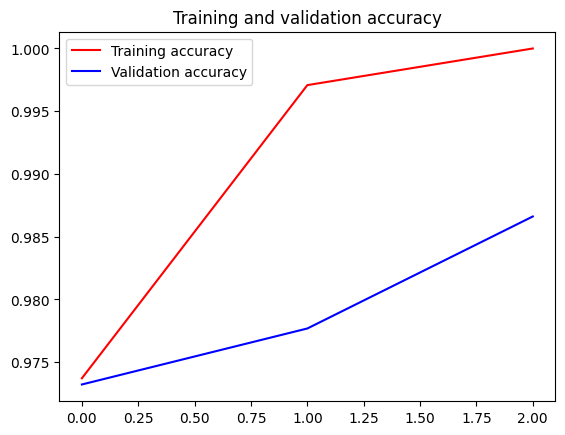

In [ ]:
# Plot the training and validation accuracies for each epoch

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f'Test loss: {test_loss},\nTest accuracy: {test_accuracy}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.0213
Test loss: 0.021302394568920135,
Test accuracy: 1.0
